In [12]:
from collections import defaultdict

In [13]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
 # set directory - /bioinformatics/Analysis/Algorithms_for_genomic_seq

--2024-06-30 12:19:47--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.173, 18.245.133.72, 18.245.133.132, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.02s   

2024-06-30 12:19:47 (2.06 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [14]:
def read_genome(filename):
    genome =""
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith('>'):
                genome += line.rstrip()
    return genome

genome = read_genome('lambda_virus.fa')

In [15]:
# len should be 48502
len(genome)

48502

In [16]:
counts = defaultdict(int)

In [17]:
# manual count of nucleotides 
for base in genome:
    if base in counts:
        counts[base] += 1
    else:
        counts[base] =1 

In [11]:
counts

defaultdict(int, {'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [18]:
#count using the python collection module 
from collections import Counter
count_col = Counter(genome)
count_col

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})

## Sequence read of fastaq file 

### analysis of quality score frequencies 

In [52]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2024-06-30 14:06:50--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.68, 18.245.133.132, 18.245.133.173, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.05s   

2024-06-30 14:06:50 (3.97 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [53]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename) as file:
        while True:
            file.readline()
            seq = file.readline().rstrip()
            file.readline()
            qual = file.readline().rstrip()
            if len(seq) == 0:
                break

            else:
                sequences.append(seq)
                qualities.append(qual)
    return sequences, qualities

In [55]:
seq, qual = read_fastq('SRR835775_1.first1000.fastq')

In [56]:
# converting the quality score to the value 

def phred33_to_Q(qual):
    """Takes the acsci character of the quality
      from fastsq file and return the value by converting it """
    return ord(qual) - 33

phred33_to_Q('#')
# the '#' is low score 

2

In [57]:
def score_frequencies(qualitlst: list):
    valuelst = [phred33_to_Q(ph) for qual in qualitlst for ph in qual]
    frequencies = Counter(valuelst)
    return frequencies 

frequencies = score_frequencies(qual)
dict(frequencies)

{30: 3387,
 33: 5476,
 16: 184,
 32: 3248,
 35: 11814,
 23: 798,
 10: 193,
 34: 8375,
 25: 888,
 18: 514,
 36: 4243,
 31: 4487,
 8: 345,
 17: 327,
 26: 1396,
 28: 993,
 7: 574,
 13: 165,
 21: 254,
 2: 6178,
 37: 7827,
 38: 6579,
 39: 8179,
 41: 8180,
 40: 9349,
 29: 1752,
 20: 531,
 24: 992,
 27: 1488,
 15: 236,
 11: 124,
 22: 313,
 12: 79,
 6: 108,
 19: 238,
 9: 83,
 5: 54,
 14: 49}

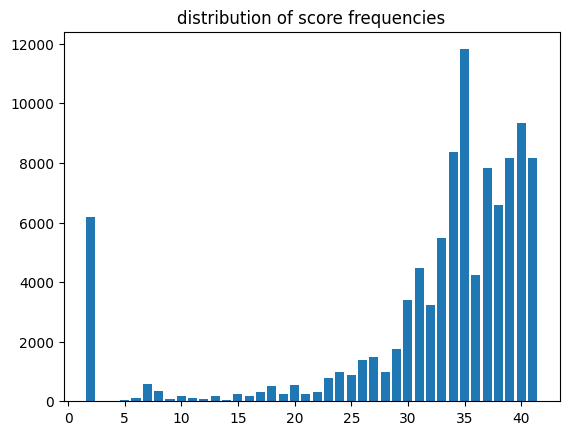

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(list(dict(frequencies).keys()), list(dict(frequencies).values()))
plt.title("distribution of score frequencies")
plt.show()

### GC content of reads 

In [136]:
# all reads are 100 base long 
def findGCinEachRead(reads):
    """finds the CG content and index where the CG bases is found """
    percentLst = []
    for seq in reads: 
        all_bases = dict(Counter(seq))
        percent = None
        if 'G' in all_bases and "C" in all_bases:
            percent =(all_bases['G'] + all_bases['C']) / sum(list(all_bases.values()))
        elif "G" in all_bases:
            percent = all_bases['G'] / sum(list(all_bases.values()))
        elif "C" in all_bases:
            percent = all_bases['C'] / sum(list(all_bases.values()))
        percentLst.append(percent)
    return percentLst

                         
GC_content = findGCinEachRead(seq)
print(GC_content)


[0.51, 0.5, 0.5, 0.52, 0.52, 0.57, 0.56, 0.51, 0.53, 0.59, 0.51, 0.63, 0.52, 0.52, 0.49, 0.5, 0.48, 0.53, 0.43, 0.52, 0.5, 0.53, 0.5, 0.51, 0.5, 0.52, 0.51, 0.53, 0.52, 0.5, 0.66, 0.5, 0.55, 0.56, 0.5, 0.49, 0.55, 0.49, 0.51, 0.51, 0.51, 0.52, 0.54, 0.5, 0.5, 0.55, 0.52, 0.56, 0.47, 0.6, 0.55, 0.55, 0.46, 0.47, 0.52, 0.49, 0.55, 0.51, 0.48, 0.52, 0.5, 0.48, 0.52, 0.49, 0.5, 0.52, 0.49, 0.5, 0.5, 0.53, 0.5, 0.49, 0.51, 0.55, 0.47, 0.49, 0.51, 0.54, 0.51, 0.51, 0.49, 0.5, 0.57, 0.51, 0.52, 0.5, 0.58, 0.56, 0.48, 0.55, 0.52, 0.47, 0.65, 0.51, 0.53, 0.52, 0.49, 0.58, 0.58, 0.6, 0.51, 0.51, 0.55, 0.5, 0.59, 0.51, 0.6, 0.55, 0.5, 0.63, 0.51, 0.61, 0.53, 0.48, 0.5, 0.51, 0.49, 0.54, 0.52, 0.51, 0.52, 0.57, 0.54, 0.52, 0.51, 0.53, 0.51, 0.5, 0.52, 0.5, 0.52, 0.56, 0.55, 0.59, 0.55, 0.56, 0.54, 0.49, 0.55, 0.51, 0.53, 0.54, 0.52, 0.49, 0.6, 0.51, 0.53, 0.54, 0.53, 0.52, 0.6, 0.63, 0.52, 0.47, 0.52, 0.51, 0.5, 0.49, 0.54, 0.5, 0.5, 0.51, 0.56, 0.55, 0.5, 0.51, 0.56, 0.5, 0.53, 0.48, 0.53, 0.49, 

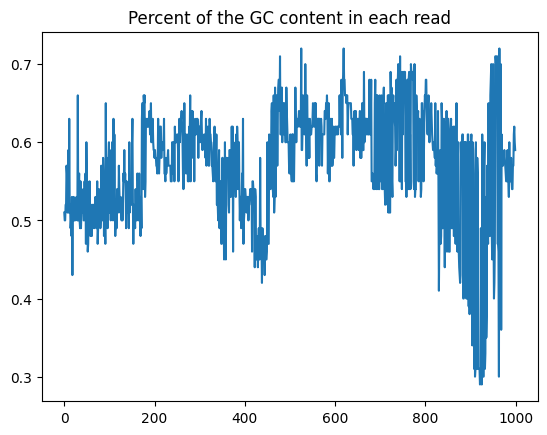

In [71]:
plt.plot(range(len(GC_content)), GC_content)
plt.title("Percent of the GC content in each read")
plt.show()
# summary: we have 1000 reads and in the late reads the content of CG is changing 
# drastically 0.3 to 0.7. usually CG conten in human genome around 0.50 +/- 0.05 
# Thus we can conclude tha on the late reads quality is not great due to the high noise may be 

In [73]:
#lets see the distribution of the nucletides in all reads -> do easy with standart library
# N - means no confidence in base -> sequencer will reporter could not figurate out what is it

count = Counter()
for s in seq:
    count.update(s)

print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


### Naive aligment algorithm - exact match 


In [74]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2024-06-30 16:02:38--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.68, 18.245.133.132, 18.245.133.173, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2024-06-30 16:02:39 (69.4 MB/s) - ‘phix.fa’ saved [5528/5528]



In [75]:
unk_genome = read_genome('phix.fa')

In [81]:
def naive(p: str, t: str):
    """takes the pattern -> p and find all the matches in genome p"""
    occurences = []
    for i in range(len(t)-len(p)+1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences



In [82]:
t = 'AGCTTAGATAGC'
p = 'AG'
matches = naive(p,t)
print(matches)

[0, 5, 9]


In [84]:
# create the randon genome from the reference genome
import random
def generateSeq(genome: str, numReads: int, readLen: int) -> list:
    """Generate the reads from random positions in a given genome"""
    reads = []
    for _ in range(numReads):
        start = random.randint(0,len(genome)-readLen -1)
        reads.append(genome[start:start+readLen])
    return reads

In [85]:
reads = generateSeq(unk_genome, 100, 150)

In [87]:
numMatch = 0 
for r in reads:
    matches = naive(r, unk_genome)
    if len(matches) >0:
        numMatch +=1

print(f"{numMatch} {len(reads)} reads matched exactly")


100 100 reads matched exactly


### real sequences match 

In [88]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2024-06-30 16:19:10--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.245.133.72, 18.245.133.132, 18.245.133.173, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.245.133.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.1s    

2024-06-30 16:19:10 (2.06 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [89]:
reads, qual = read_fastq('ERR266411_1.first1000.fastq')

In [90]:
numMatch = 0 
n = 0 
for r in reads:
    matches = naive(r, unk_genome)
    n +=1
    if len(matches) >0:
        numMatch +=1
        
print(f"{numMatch} {len(reads)} reads matched exactly")

7 1000 reads matched exactly


In [91]:
# lets try only first 30 bases from the reads to match 
numMatch = 0 
n = 0 
for r in reads:
    r = r[:30]
    matches = naive(r, unk_genome)
    n +=1
    if len(matches) >0:
        numMatch +=1
        
print(f"{numMatch} {len(reads)} reads matched exactly")

459 1000 reads matched exactly


why  so less of the reads match the genome?
1. sequencer errors
2. the difference between the sequence ( our template) and reference genome
3. the reference genome is double stranded but your reads comes eighter from the one strand or another. So this may cause the difference as well -> so we need to match also the reverse complement string as well to the genome 


In [96]:
dna_reverse_complement = {'A':'T', 
                          'T': 'A', 
                          'G': 'C', 
                          'C' : 'G', 
                          'N': 'N'}
def reverse_complement(seq: str) -> str:
    """ Takes the string DNA and return the reversed dna string 
     by replacing the A to T and C to G and reversing the string after all """
    return  ''.join([dna_reverse_complement[nuc] for nuc in seq])[::-1]

In [99]:
numMatch = 0 
n = 0 
for r in reads:
    r = r[:30]
    matches = naive(r, unk_genome)
    reversed_str = reverse_complement(r)
    matches.extend(naive(reversed_str, unk_genome))
    n +=1
    if len(matches) >0:
        numMatch +=1
        
print(f"{numMatch} {len(reads)} reads matched exactly")

932 1000 reads matched exactly


Summary: exact matching due to the error in sequencing is not possible. 
Approximate matching may be better in some cases.  

### Homework module 1 for Algoritms in Genomics 
Implementing the naive function with will take care the reverse complement string and will acount match ones in cases when string = reverve comeplement str 


In [100]:
#1. lets check if reverse_complement = str 
#2. if it is != run reversed and str 
#3. if it is == run only one str 

def naive_with_rc(p: str, t: str):
    """takes the pattern -> p and find all the matches in genome p"""
    occurences = []
    reversed_str = reverse_complement(p)
    if p == reversed_str:
        for i in range(len(t)-len(p)+1):
            match = True
            for j in range(len(p)):
                if not t[i+j] == p[j]:
                    match = False
                    break
            if match:
                occurences.append(i)
    elif p != reversed_str:
        for i in range(len(t)-len(p)+1):
            match = True
            for j in range(len(p)):
                if not t[i+j] == p[j]:
                    match = False
                    break
            if match:
                occurences.append(i) 
        for i in range(len(t)-len(reversed_str)+1):
            match = True
            for j in range(len(reversed_str)):
                if not t[i+j] == reversed_str[j]:
                    match = False
                    break
            if match:
                occurences.append(i)
    return occurences

In [101]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [102]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [110]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
phix_genome = readGenome('phix.fa')

In [111]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [108]:
occurrences

[]

In [112]:
print(f'offset of leftmost occurrence:  {min(occurrences)}')

offset of leftmost occurrence:  62


In [113]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


## the exam 

In [114]:
def read_genome(filename):
    genome =""
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith('>'):
                genome += line.rstrip()
    return genome

genome = read_genome('lambda_virus.fa')

In [124]:
# question1 
occurrences = naive_with_rc('AGGT', genome)
print(len(occurrences))

306


In [123]:
# question 2 
occurrences = naive_with_rc('TTAA', genome)

print(len(occurrences))

195


In [120]:
# question 3 
occurrences = naive_with_rc('ACTAAGT', genome)
print(f'offset of leftmost occurrence:  {min(occurrences)}')

offset of leftmost occurrence:  26028


In [122]:
# question 4 
occurrences = naive_with_rc('AGTCGA', genome)
print(f'offset of leftmost occurrence:  {min(occurrences)}')

offset of leftmost occurrence:  450


In [125]:
# question 5 
def naive_2mm(p: str, t: str):
    """takes the pattern -> p and find all the matches in genome p"""
    occurences = []
    reversed_str = reverse_complement(p)
  
    for i in range(len(t)-len(p)+1):
        count = 0 
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                count +=1
                if count >2:
                    match = False
                    break

        if match:
            occurences.append(i)

    return occurences

In [126]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [127]:
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 10
# occurrences: 79


In [128]:
occurrences = naive_2mm('TTCAAGCC', genome)
print(len(occurrences))


191


In [129]:
# question 6 
occurrences = naive_2mm('AGGAGGTT', genome)
print(min(occurrences))

49


In [130]:
# quesiton 7
reads, qual = read_fastq('ERR266411_1.first1000.fastq')

In [132]:
frequencies = score_frequencies(qual)
result = dict(frequencies)
print(sorted(result.items(), key = lambda x: x[1]))


[(1, 2), (2, 4), (0, 6), (5, 14), (4, 14), (3, 20), (8, 35), (15, 39), (14, 41), (13, 70), (43, 70), (7, 119), (16, 126), (9, 169), (6, 215), (20, 224), (18, 255), (25, 270), (42, 286), (12, 302), (26, 315), (17, 363), (27, 371), (22, 474), (10, 506), (28, 515), (23, 519), (11, 553), (21, 644), (19, 704), (24, 760), (29, 937), (30, 1078), (41, 1114), (32, 1542), (31, 2615), (33, 2879), (34, 3189), (40, 4099), (35, 5178), (36, 9172), (39, 14329), (37, 16755), (38, 29108)]


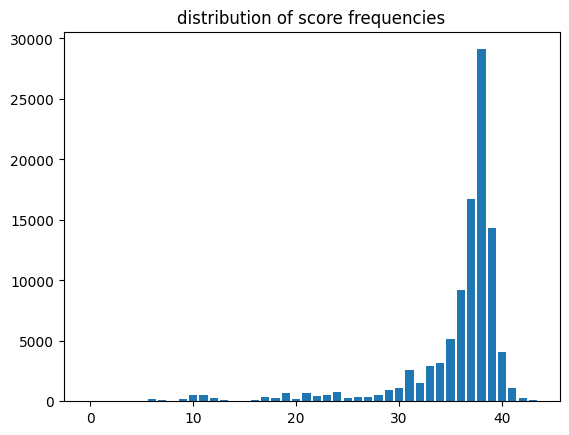

In [134]:
plt.bar(list(dict(frequencies).keys()), list(dict(frequencies).values()))
plt.title("distribution of score frequencies")
plt.show()

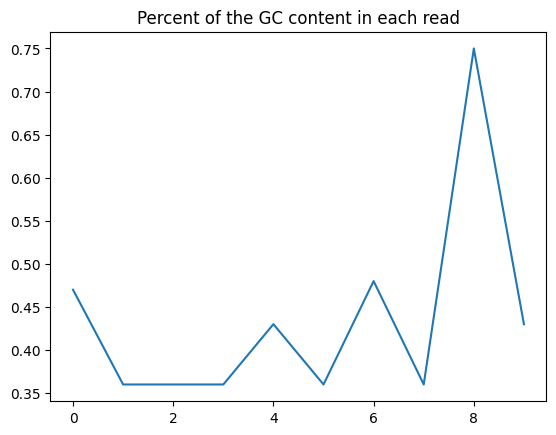

In [140]:
gc = findGCinEachRead(reads)
plt.plot(range(len(gc[210:220])), gc[210:220])
plt.title("Percent of the GC content in each read")
plt.show()